# Digital Futures Academy Project: **Swan Teleco**

In [83]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler 
## Import the metrics we'll be using
from sklearn import metrics
## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [84]:
# Read the data into a Pandas DataFrame
swan = pd.read_excel("1 - Project Data.xlsx")

In [87]:
import pandas as pd

df = pd.read_excel("1 - Project Data.xlsx")  


In [53]:
swan.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


## **EDA**

### Check Data Types

In [4]:
swan.shape[0]

7043

In [5]:
swan.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

### Cleaning
* Redundant column removal
  * `Churn Label`
* Correcting data types
  * `Total Charges` --> object to float
* Null Value handling
  * Replace ' ' with 0 where `Total Charges == ' '`

In [54]:
((swan['Churn Label'] == 'No')&(swan['Churn Value'] == 0)).sum()

5174

In [55]:
swan.drop(columns = ['Churn Label'], inplace =True)

In [56]:
(swan['Total Charges'] == ' ').sum()

11

In [57]:
swan[swan['Total Charges'] == ' ']['Tenure Months']

2234    0
2438    0
2568    0
2667    0
2856    0
4331    0
4687    0
5104    0
5719    0
6772    0
6840    0
Name: Tenure Months, dtype: int64

In [10]:
swan['Total Charges'].replace(' ', 0, inplace=True)

/var/folders/rv/4llj5_152rz96jjz6_bjj5xc0000gn/T/ipykernel_53094/4219716417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  swan['Total Charges'].replace(' ', 0, inplace=True)
/var/folders/rv/4llj5_152rz96jjz6_bjj5xc0000gn/T/ipykernel_53094/4219716417.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [ ]:
swan['Total Charges'] = swan['Total Charges'].astype(float)

In [61]:
swan[swan['Total Charges'] == 0]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Reason


### Train-Test Split

In [62]:
feature_cols = list(swan.columns)
feature_cols.remove('Churn Value')

X = swan[feature_cols]
y = swan['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
(X_train.index != y_train.index).sum()

0

### Explore Target

In [64]:
train = X_train.copy()
train['Churn Value'] = y_train.copy()


In [65]:
train['Churn Value'].value_counts(normalize = True)

Churn Value
0    0.739262
1    0.260738
Name: proportion, dtype: float64

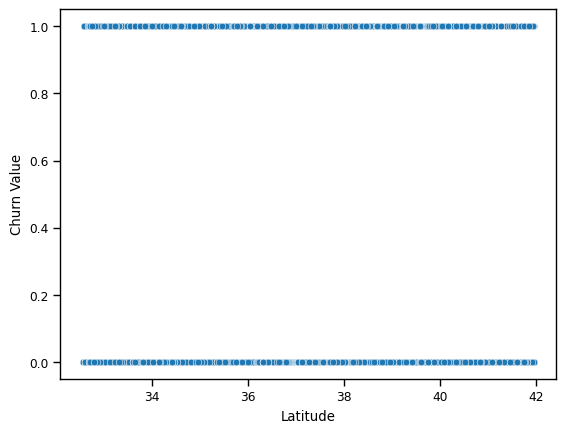

In [66]:
sns.scatterplot(data=train, x='Latitude', y='Churn Value')
plt.show()

### Churner Demographic

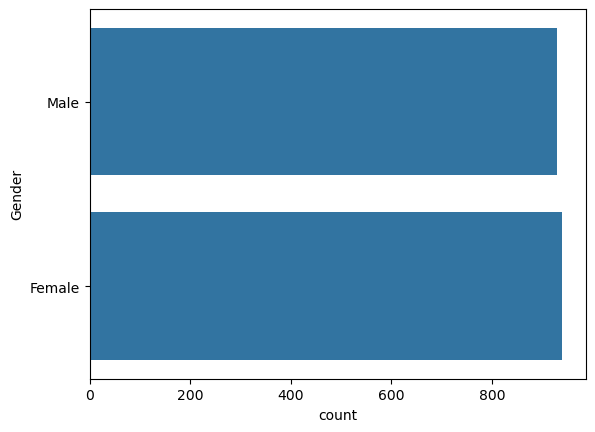

In [18]:
sns.countplot(swan[swan['Churn Value']==1]['Gender'])
plt.show()

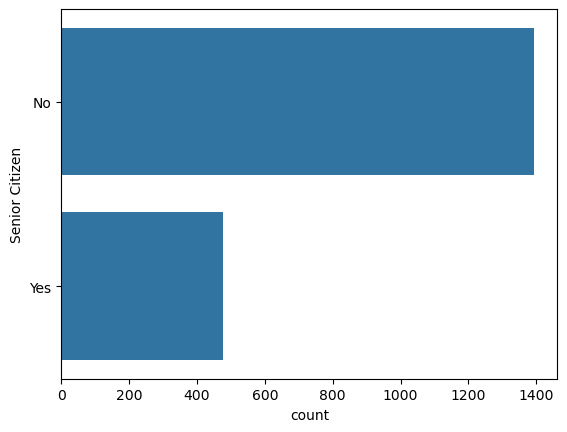

In [19]:
sns.countplot(swan[swan['Churn Value']==1]['Senior Citizen'])
plt.show()

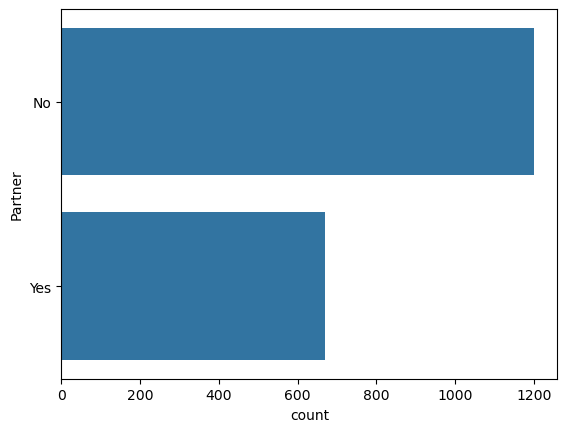

In [20]:
sns.countplot(swan[swan['Churn Value']==1]['Partner'])
plt.show()

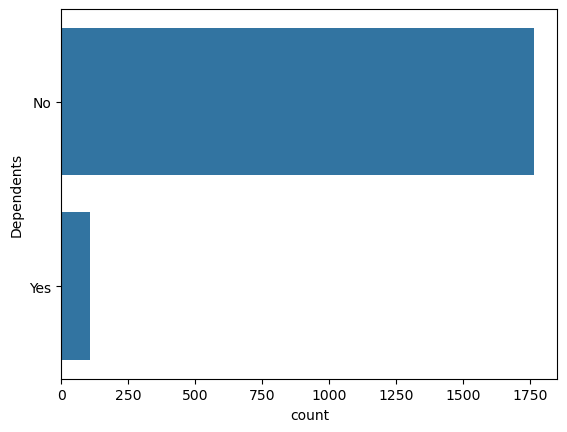

In [21]:
sns.countplot(swan[swan['Churn Value']==1]['Dependents'])
plt.show()

### Finding relationships

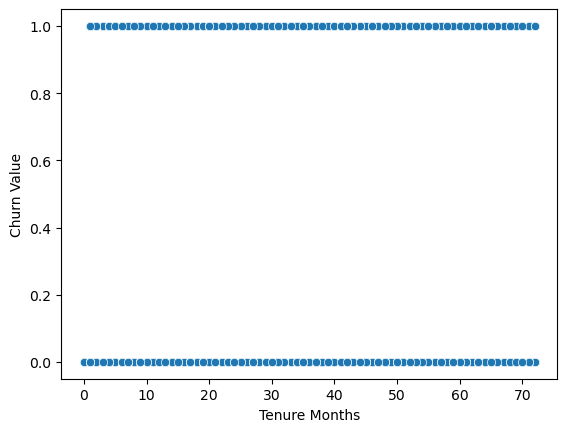

In [22]:
sns.scatterplot(train, x='Tenure Months', y='Churn Value')
plt.show()

## **Feature Engineering**

### To-Do:

* Drop from Feature List: `CustomerID`,`Count`,`Country`,`State`,`City`,`Zip Code`,`Lat Long`,`Churn Reason`
* Boolean Label Encode: `Gender`,`Senior Citizen`,`Partner`,`Dependents`,`Phone Service`,`Paperless Billing`,`Multiple Lines`,`Online Security`,`Online Backup`,`Device Protection`,`Tech Support`,`Streaming TV`,`Streaming Movies`
* Order Label Encode: `Contract`
* One-Hot Encode: `Internet Service`,`Payment Method`
* Feature Scaling: Max-Min Scale every feature

In [23]:
def bool_labeling(df, col_name):
    df = df.copy()
    col = df[col_name].replace({r'^No.*':0,'Yes':1,0:0,1:1}, regex=True)
    return col

In [24]:
def gender_labeling(df, col_name):
    df = df.copy()
    col = df[col_name].replace({'Male':0,'Female':1,0:0,1:1})
    return col

In [25]:
def contract_labeling(df, col_name):
    df=df.copy()
    col = df[col_name].replace({'One year':12,'Month-to-month':1,'Two year':24})
    return col

In [26]:
def ohe(df, col_name):
    df=df.copy()
    df=pd.get_dummies(df, columns = [f'{col_name}'], prefix = f'{col_name}', drop_first = True, dtype='int')
    return df

In [67]:
def feature_engineering(df):
    df=df.copy()
    
    df.drop(columns=['CustomerID','Count','Country','State','City','Zip Code','Lat Long','Churn Reason'],inplace = True)

    for col_name in ['Senior Citizen','Partner','Dependents','Phone Service','Paperless Billing','Multiple Lines',
                     'Online Security','Online Backup','Device Protection','Tech Support','Streaming TV',
                     'Streaming Movies']:
        df[col_name] = bool_labeling(df, col_name)

    df['Gender'] = gender_labeling(df, 'Gender')

    df['Contract'] = contract_labeling(df, 'Contract')

    df = ohe(df,'Internet Service')
    df = ohe(df,'Payment Method')

    return df
    

In [28]:
X_train_fe = feature_engineering(X_train)

/var/folders/rv/4llj5_152rz96jjz6_bjj5xc0000gn/T/ipykernel_53094/2918864045.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  col = df[col_name].replace({r'^No.*':0,'Yes':1,0:0,1:1}, regex=True)


In [29]:
train_minmax = MinMaxScaler() ## Initialise scaler
train_minmax.fit(X_train_fe)

MinMaxScaler()

In [30]:
def max_min(df):
    global train_minmax
    df=df.copy()
    df = train_minmax.transform(df)
    return df

In [31]:
X_train_fe_scaled = pd.DataFrame(max_min(X_train_fe), index = X_train_fe.index, columns = X_train_fe.columns)

In [32]:
X_train_fe_scaled.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,...,Streaming Movies,Contract,Paperless Billing,Monthly Charges,Total Charges,Internet Service_Fiber optic,Internet Service_No,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
2142,0.026273,0.719622,0.0,0.0,1.0,0.0,0.986111,1.0,1.0,0.0,...,1.0,0.478261,1.0,0.801196,0.801728,1.0,0.0,1.0,0.0,0.0
1623,0.562589,0.377385,1.0,0.0,0.0,0.0,0.222222,1.0,0.0,0.0,...,1.0,0.000000,1.0,0.746886,0.181202,1.0,0.0,1.0,0.0,0.0
6074,0.207249,0.627822,1.0,0.0,0.0,0.0,0.444444,1.0,1.0,0.0,...,1.0,0.478261,1.0,0.855007,0.393429,1.0,0.0,1.0,0.0,0.0
1362,0.162030,0.618756,1.0,1.0,1.0,0.0,0.333333,0.0,0.0,0.0,...,1.0,0.000000,1.0,0.223219,0.107464,0.0,0.0,1.0,0.0,0.0
6754,0.152314,0.590326,1.0,0.0,1.0,1.0,0.277778,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.017937,0.046754,0.0,1.0,0.0,0.0,1.0


## **Modeling**

In [33]:
lr = LogisticRegression(max_iter=300, random_state=10)

In [34]:
lr.fit(X_train_fe_scaled, y_train)

LogisticRegression(max_iter=300, random_state=10)

In [35]:
results = pd.DataFrame()
results[['prob_stay', 'prob_leave']] = lr.predict_proba(X_train_fe_scaled)

In [36]:
results['y_pred'] = np.where(results['prob_leave']>.5, 1, 0)

In [37]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [38]:
get_results(y_train, results['y_pred'])

The confusion matrix for your predictions is:
[[3758  407]
 [ 625  844]] 

The accuracy of your model is: 0.8168264110756124
The recall of your model is: 0.5745405037440435
The precision of your model is: 0.6746602717825739
The F1-score of your model is: 0.6205882352941177


## **Evaluation**

In [39]:
X_test_fe = feature_engineering(X_test)

/var/folders/rv/4llj5_152rz96jjz6_bjj5xc0000gn/T/ipykernel_53094/2918864045.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  col = df[col_name].replace({r'^No.*':0,'Yes':1,0:0,1:1}, regex=True)


In [40]:
X_test_fe_scaled = pd.DataFrame(max_min(X_test_fe), index = X_test_fe.index, columns = X_test_fe.columns)

In [41]:
results_test = pd.DataFrame()
results_test[['prob_stay', 'prob_leave']] = lr.predict_proba(X_test_fe_scaled)

In [42]:
results_test['y_pred'] = np.where(results_test['prob_leave']>.5, 1, 0)

In [43]:
get_results(y_test, results_test['y_pred'])

The confusion matrix for your predictions is:
[[901 108]
 [168 232]] 

The accuracy of your model is: 0.8041163946061036
The recall of your model is: 0.58
The precision of your model is: 0.6823529411764706
The F1-score of your model is: 0.6270270270270271


**EDA Visualisations pt 2**

 **Churn by Senior Citizen, Partner, and Dependents**

This visualisation explores how churn relates to:
- Whether the customer is a **Senior Citizen**
- Whether they have a **Partner**
- Whether they have **Dependents**

Understanding these relationships can inform targeted retention strategies for specific customer groups.


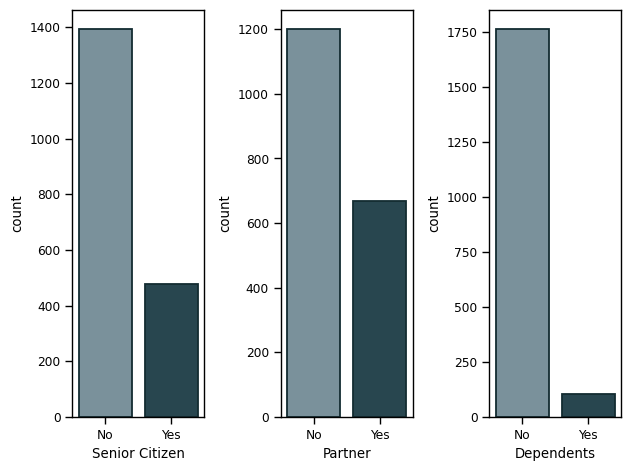

In [78]:
colors = ['#7593A0', '#224955']
edges = ['#132C31']

sns.set_context('paper')

#plt.subplot(3,1,1)
#sns.countplot(data = swan[swan['Churn Value']==1], x = 'Gender',
   #          hue = 'Gender',
    #         palette = colors,
    #         linewidth=1.3,
     #        edgecolor = edges)

plt.subplot(1,3,1)
sns.countplot(data = swan[swan['Churn Value']==1], x = 'Senior Citizen',
             hue = 'Senior Citizen',
             palette = colors,
             linewidth=1.3,
             edgecolor = edges)

plt.subplot(1,3,2)
sns.countplot(data = swan[swan['Churn Value']==1], x = 'Partner',
             hue = 'Partner',
             palette = colors,
             linewidth=1.3,
             edgecolor = edges)

plt.subplot(1,3,3)
sns.countplot(data = swan[swan['Churn Value']==1], x = 'Dependents',
             hue = 'Dependents',
             palette = colors,
             linewidth=1.3,
             edgecolor = edges)



plt.tight_layout()

plt.savefig('Demo2.jpg')


In [45]:
swan[swan['Churn Value']==1]['Dependents'].value_counts(normalize=True)

Dependents
No     0.943285
Yes    0.056715
Name: proportion, dtype: float64

In [79]:
phone_df = pd.DataFrame({'Phone Services':['No Phone Service','Single Line','Multiple Lines'],
                         'Churned':[len(swan[(swan['Multiple Lines']=='No phone service')&(swan['Churn Value']==1)]),
                                     len(swan[(swan['Multiple Lines']=='No')&(swan['Churn Value']==1)]),
                                     len(swan[(swan['Multiple Lines']=='Yes')&(swan['Churn Value']==1)])],
                         'Stayed':[len(swan[(swan['Multiple Lines']=='No phone service')&(swan['Churn Value']==0)]),
                                     len(swan[(swan['Multiple Lines']=='No')&(swan['Churn Value']==0)]),
                                     len(swan[(swan['Multiple Lines']=='Yes')&(swan['Churn Value']==0)])]})
phone_df

,Phone Services,Churned,Stayed
0,No Phone Service,170,512
1,Single Line,849,2541
2,Multiple Lines,850,2121


In [80]:
849/(170+849+850)

0.45425361155698235

**Churn by Phone Service Type**

This stacked bar chart shows the number of customers who **churned** or **stayed**, segmented by their **Phone Service type**. 

Each segment is annotated with the actual count to make the chart easier to interpret.


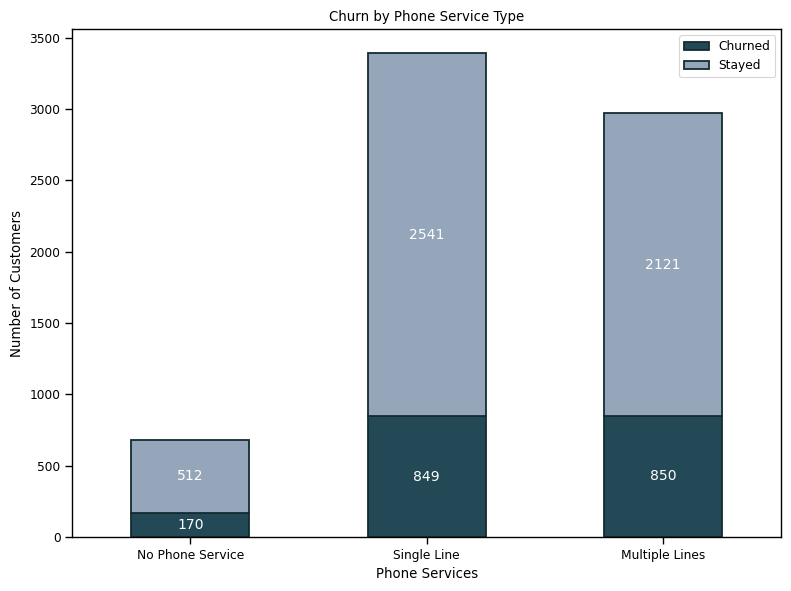

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#224955', '#95A6BA']
edges = ['#132C31']

sns.set_context('paper')

# Plot
ax = phone_df.set_index('Phone Services').plot(kind='bar',
                                               stacked=True,
                                               color=colors,
                                               linewidth=1.3,
                                               edgecolor=edges,
                                               figsize=(8,6))

plt.xticks(rotation=0)
plt.title('Churn by Phone Service Type')
plt.ylabel('Number of Customers')

# Annotate with total counts on top of bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (x + width/2, y + height/2),
                    ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.savefig('Phone_Services_annotated.jpg')
plt.show()


 **Churn by Contract Type**

This visualisation shows how churn varies by the **type of contract** customers have:
- **Month-to-month**
- **One year**
- **Two year**

It also includes **counts directly on the bars** for better readability.


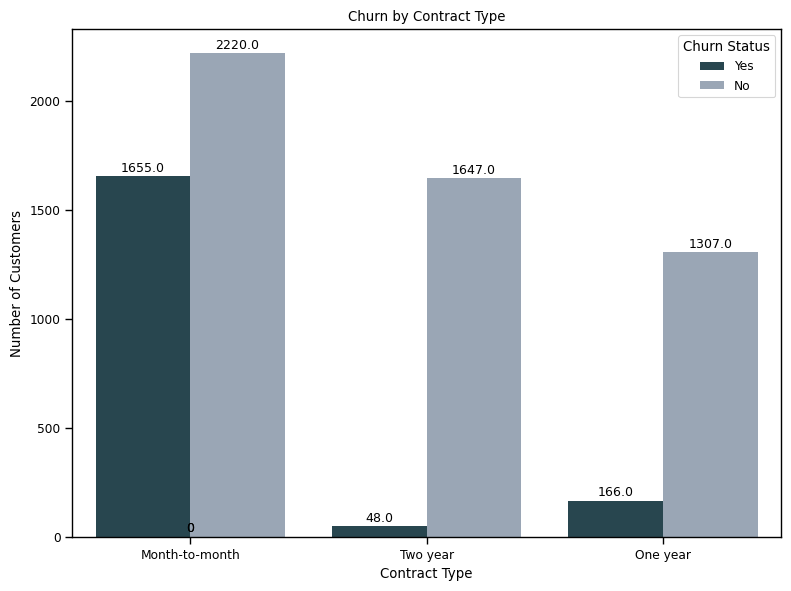

In [89]:
colors = ['#224955', '#95A6BA']

plt.figure(figsize=(8,6))

ax = sns.countplot(data=df, x='Contract', hue='Churn Label', palette=colors)

plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status')

# Annotate each bar with count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points', 
                fontsize=9, color='black')

plt.tight_layout()
plt.show()


**Tenure Distribution by Churn Status**

This boxplot shows the **distribution of tenure (number of months a customer has stayed)**, split by churn status.

It helps identify whether **customers with shorter tenure are more likely to churn**.

/var/folders/rv/4llj5_152rz96jjz6_bjj5xc0000gn/T/ipykernel_53094/2448515640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Churn Label', y='Tenure Months', palette=colors)


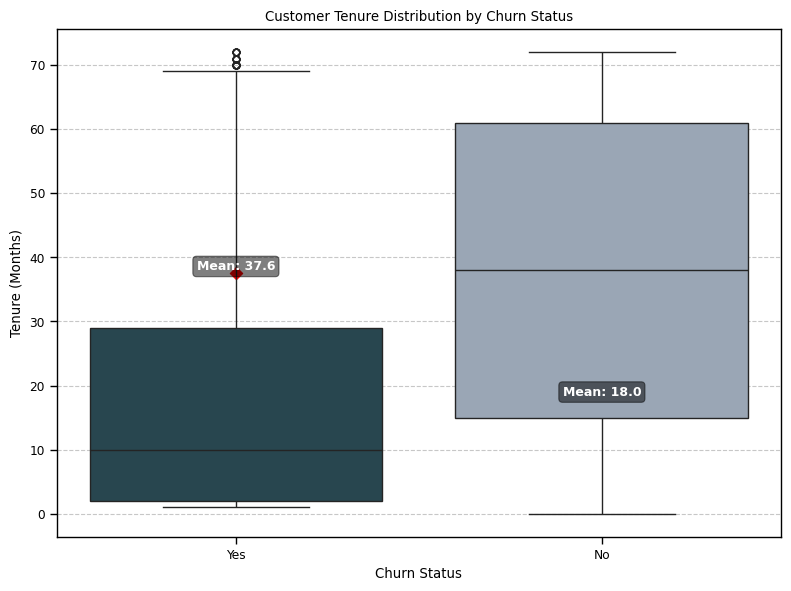

In [99]:
plt.figure(figsize=(8,6))

ax = sns.boxplot(data=df, x='Churn Label', y='Tenure Months', palette=colors)

# Calculate mean tenure per churn label
means = df.groupby('Churn Label')['Tenure Months'].mean()

# Plot mean markers and annotate on each box
for i, mean in enumerate(means):
    ax.scatter(i, mean, color='red', marker='D', s=40, label='Mean' if i == 0 else "")
    ax.text(i, mean, f'Mean: {mean:.1f}', 
            horizontalalignment='center', 
            verticalalignment='bottom', 
            color='white', fontsize=9, weight='bold',
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

plt.title('Customer Tenure Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Tenure (Months)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


>  **Insight Box**
>
> The boxplot above shows the **tenure distribution** (in months) between customers who **churned** (`Churn Label = Yes`) and those who **stayed** (`Churn Label = No`).
>
> - **Churned customers**: Have a **mean tenure of ~18 months**. This means on average, customers who leave tend to leave within the first 1 to 1.5 years.
> - **Retained customers**: Have a **mean tenure of ~38 months**, showing that longer-tenured customers are more likely to stay.
>
>  **Key takeaway**:  
> Customers with a **shorter tenure are more likely to churn**, which makes **tenure months a critical feature** in predicting churn.  
> Retention strategies should focus on customers **early in their lifecycle (under 20 months)** to prevent churn.


 **Monthly Charges by Churn Status**

This visualisation compares the **Monthly Charges** paid by customers who churned versus those who stayed.

This helps us see if **higher or lower bills correlate with churn**.


/var/folders/rv/4llj5_152rz96jjz6_bjj5xc0000gn/T/ipykernel_53094/1617918821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Churn Label', y='Monthly Charges', palette=colors)


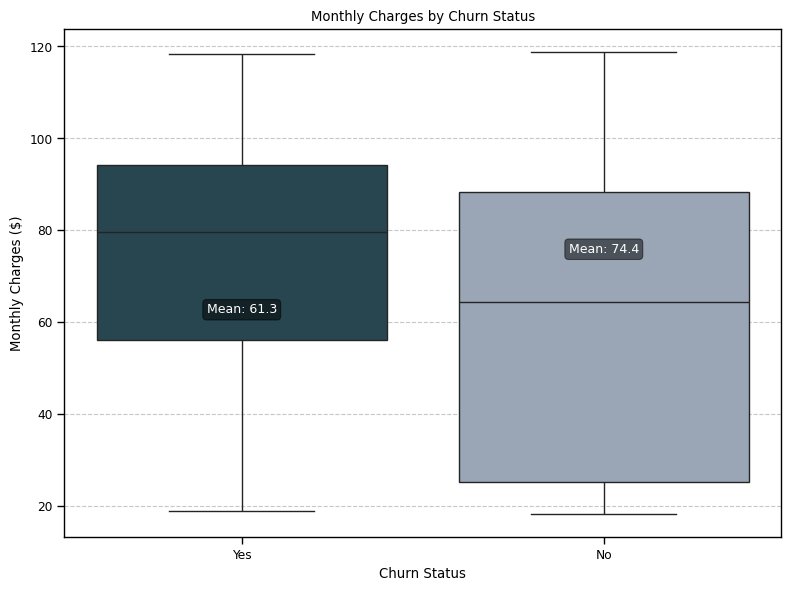

In [100]:
plt.figure(figsize=(8,6))

ax = sns.boxplot(data=df, x='Churn Label', y='Monthly Charges', palette=colors)

means = df.groupby('Churn Label')['Monthly Charges'].mean()

for i, mean in enumerate(means):
    ax.scatter(i, mean, color='red', marker='D', s=40, label='Mean' if i == 0 else "")
    ax.text(i, mean, f'Mean: {mean:.1f}', ha='center', va='bottom', color='white', fontsize=9,
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Churn by Payment Method**

This visualisation explores the relationship between **Payment Method** and churn status.  
Certain payment types may be linked to higher or lower churn rates.


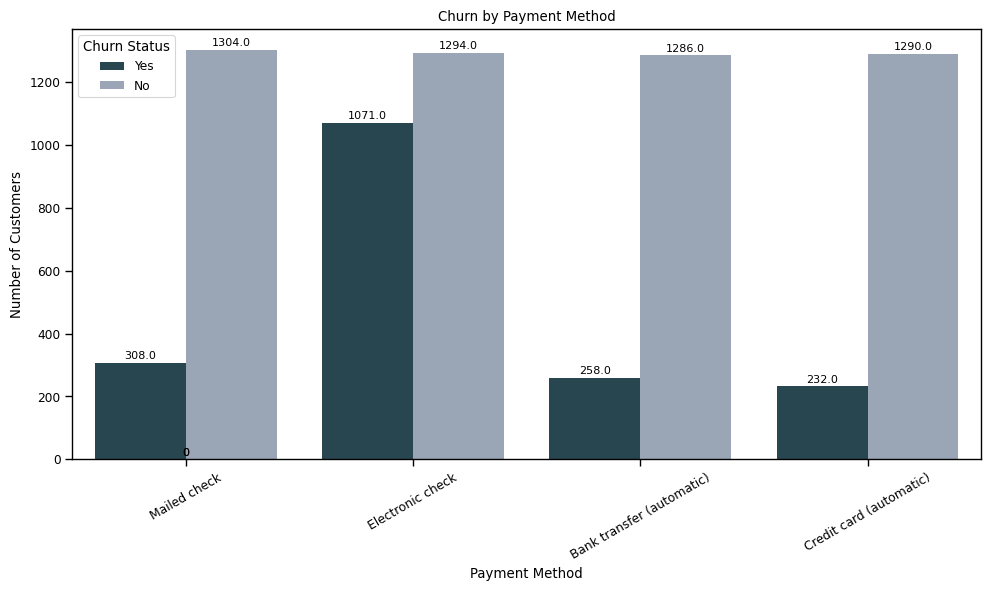

In [101]:
plt.figure(figsize=(10,6))

ax = sns.countplot(data=df, x='Payment Method', hue='Churn Label', palette=colors)

plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=30)
plt.legend(title='Churn Status')

# Annotate counts on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=8)

plt.tight_layout()
plt.show()


**Churn by Internet Service Type**

This visualisation examines the relationship between the type of internet service (DSL, Fiber Optic, None) and churn status.


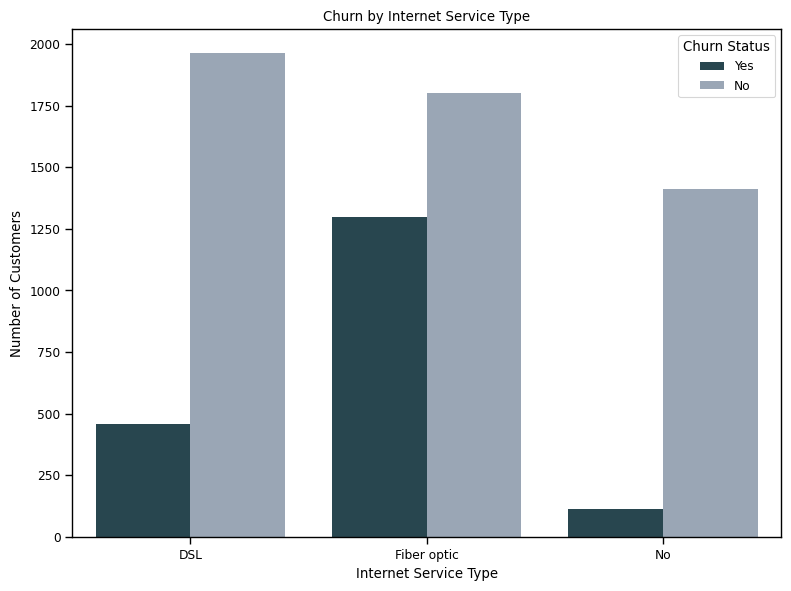

In [102]:
plt.figure(figsize=(8,6))

ax = sns.countplot(data=df, x='Internet Service', hue='Churn Label', palette=colors)

plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status')

plt.tight_layout()
plt.show()

 **Total Charges by Churn Status**

This boxplot shows the **Total Charges** (the total amount paid by the customer so far) split by churn status.

It helps us understand if **total spend over time** has any relationship with a customer leaving or staying.


/var/folders/rv/4llj5_152rz96jjz6_bjj5xc0000gn/T/ipykernel_53094/2419526099.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Churn Label', y='Total Charges', palette=colors)


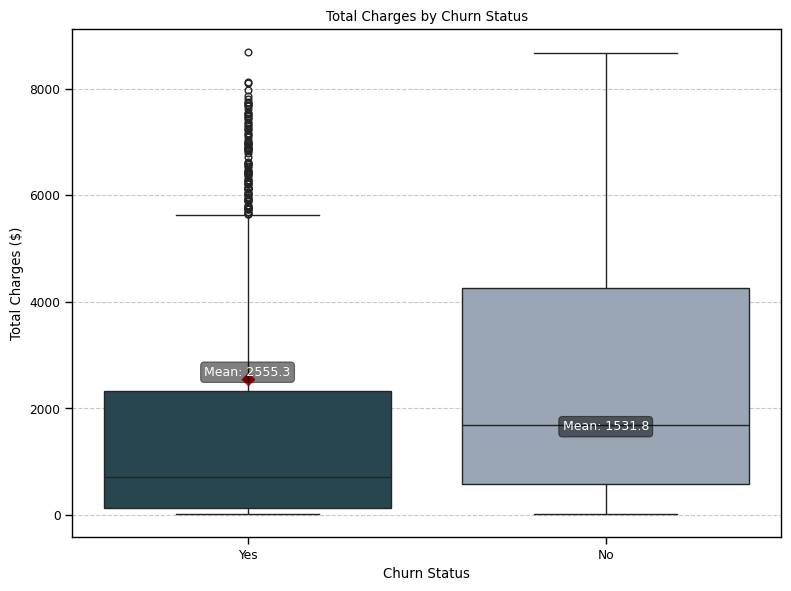

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the Total Charges column (convert to numeric, set errors='coerce' to turn invalid strings to NaN)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df = df.dropna(subset=['Total Charges'])

# Define color palette
colors = ['#224955', '#95A6BA']

plt.figure(figsize=(8,6))

ax = sns.boxplot(data=df, x='Churn Label', y='Total Charges', palette=colors)

# Calculate mean total charges per churn label
means = df.groupby('Churn Label')['Total Charges'].mean()

for i, mean in enumerate(means):
    ax.scatter(i, mean, color='red', marker='D', s=40, label='Mean' if i == 0 else "")
    ax.text(i, mean, f'Mean: {mean:.1f}', ha='center', va='bottom', color='white', fontsize=9,
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

plt.title('Total Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Charges ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Correlation Heatmap of Numerical Features**

This heatmap shows the **correlation between numerical features** such as:
- Tenure Months
- Monthly Charges
- Total Charges
- Churn Value (encoded as 0 or 1)

This helps understand which variables are most related to churn and to each other.


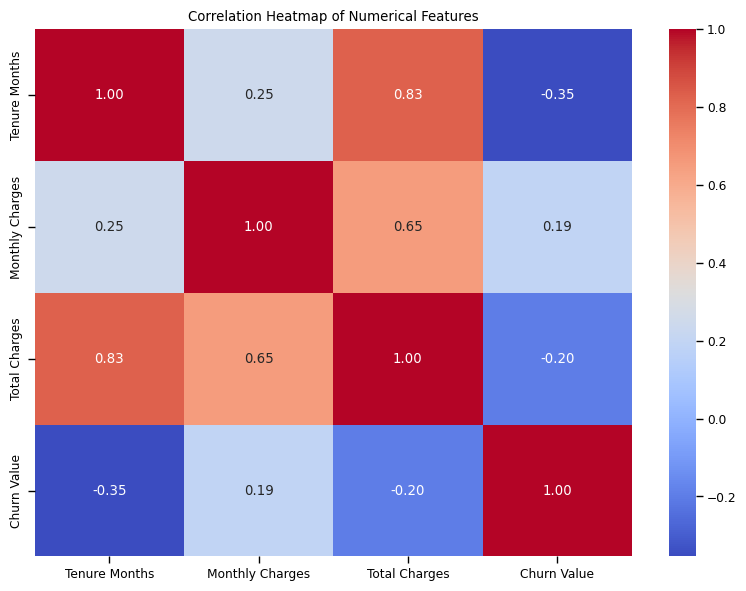

In [106]:
plt.figure(figsize=(8,6))

numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value']
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


**Churn Rate by Contract Type and Payment Method**

This visualisation shows the churn rate for **each combination of Contract Type and Payment Method**.  
It helps spot high churn risk groups based on how they pay and their contract length.


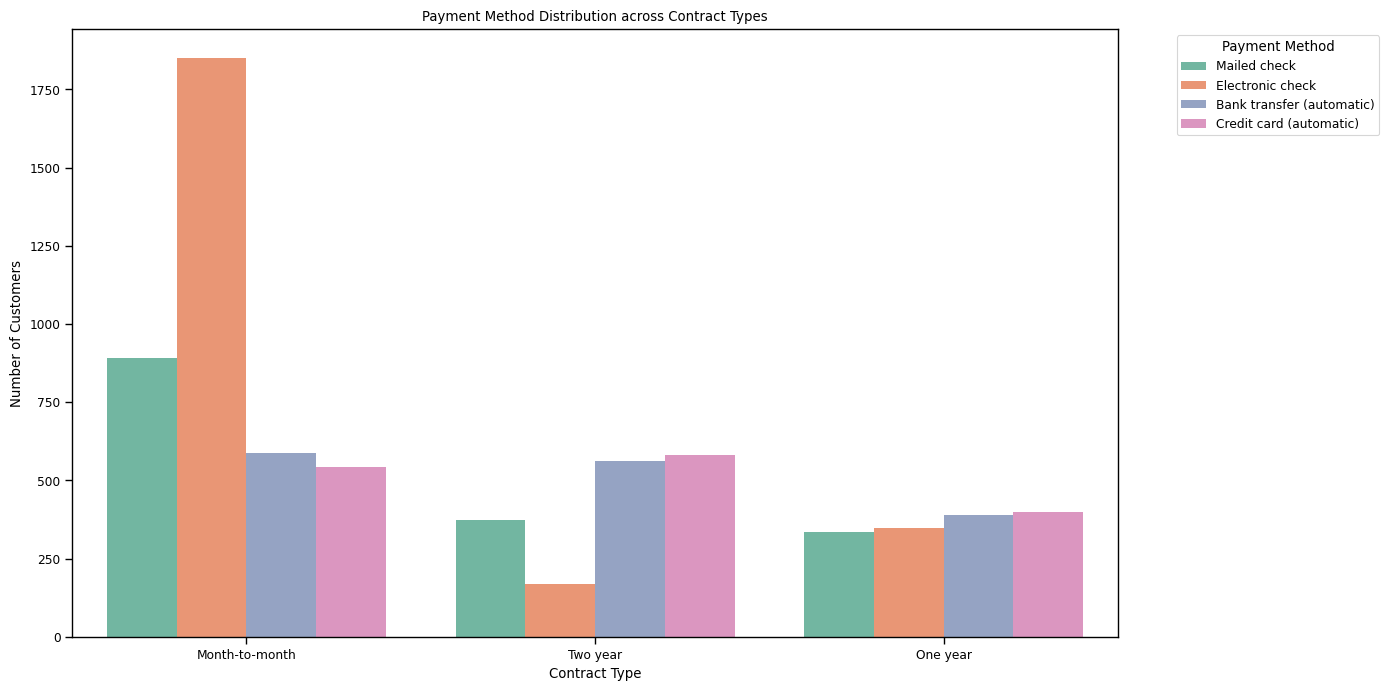

In [107]:
plt.figure(figsize=(14,7))

ax = sns.countplot(data=df, x='Contract', hue='Payment Method', palette='Set2', hue_order=df['Payment Method'].unique())

plt.title('Payment Method Distribution across Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
